In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols as sm_ols
from statsmodels.iolib.summary2 import summary_col # nicer tables
import matplotlib.pyplot as plt

In [2]:
merged = pd.read_csv("./inputs/merged.csv")

In [3]:
merged

,Year,Period,Label,SP500_Return,Percent_Change_in_GDP,CPI,Construction_Unemployment_Rate,Manufacturing_Unemployment_Rate,Finance_Unemployment_Rate
0,2005,Q01,2005 Qtr1,-0.0259,4.5,192.366667,11.4,5.3,2.6
1,2005,Q02,2005 Qtr2,0.0091,2.0,193.666667,6.4,4.6,3.2
2,2005,Q03,2005 Qtr3,0.0315,3.2,196.600000,5.6,4.9,3.2
3,2005,Q04,2005 Qtr4,0.0159,2.3,198.433333,6.4,4.8,2.5
4,2006,Q01,2006 Qtr1,0.0373,5.5,199.466667,8.7,4.5,2.6
...,...,...,...,...,...,...,...,...,...
67,2021,Q04,2021 Qtr4,0.1040,7.0,278.706667,4.6,3.1,2.2
68,2022,Q01,2022 Qtr1,-0.0518,-1.6,284.893667,6.6,3.3,2.1
69,2022,Q02,2022 Qtr2,-0.1663,-0.6,291.535667,4.0,3.0,1.5
70,2022,Q03,2022 Qtr3,-0.0517,3.2,295.495667,3.6,3.1,1.2


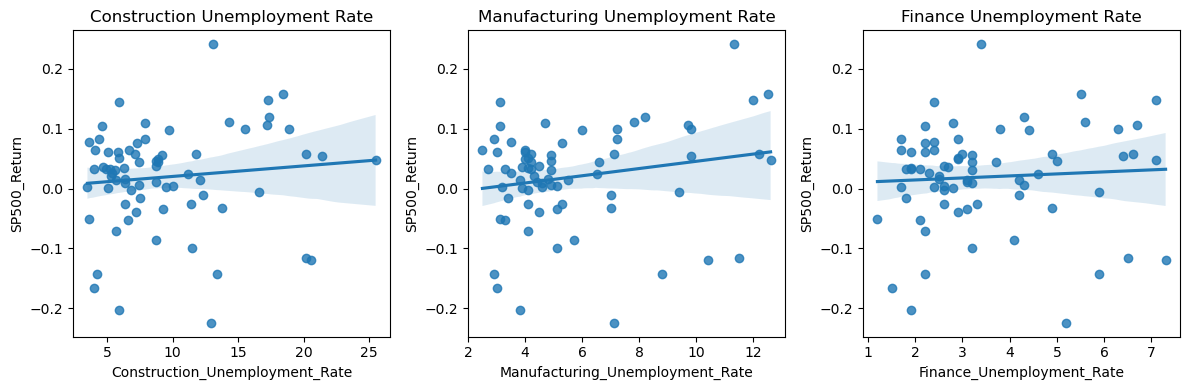

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.regplot(x='Construction_Unemployment_Rate', y='SP500_Return', data=merged, ax=axes[0])
axes[0].set_title('Construction Unemployment Rate')

sns.regplot(x='Manufacturing_Unemployment_Rate', y='SP500_Return', data=merged, ax=axes[1])
axes[1].set_title('Manufacturing Unemployment Rate')

sns.regplot(x='Finance_Unemployment_Rate', y='SP500_Return', data=merged, ax=axes[2])
axes[2].set_title('Finance Unemployment Rate')

plt.tight_layout()

plt.show()

In [5]:
SP500_CUR = sm_ols('SP500_Return ~ Construction_Unemployment_Rate', data = merged).fit()

In [6]:
SP500_MUR = sm_ols('SP500_Return ~ Manufacturing_Unemployment_Rate', data = merged).fit()

In [7]:
SP500_FUR =  sm_ols('SP500_Return ~ Finance_Unemployment_Rate', data = merged).fit()

In [8]:
SP500_UR =  sm_ols('SP500_Return ~ Construction_Unemployment_Rate + Manufacturing_Unemployment_Rate + Finance_Unemployment_Rate', data = merged).fit()

In [9]:
info_dict={'No. observations' : lambda x: f"{int(x.nobs):d}"}
info_dict={'No. observations' : lambda x: "{:,.0f}".format(x.nobs)}
table = summary_col(results=[SP500_CUR,SP500_MUR,SP500_FUR,SP500_UR],
                    float_format='%0.2f',
                    stars = True,
                    model_names=['SP500_CUR','SP500_MUR','SP500_FUR','SP500_UR'],
                    info_dict=info_dict,
                    regressor_order=['Intercept','Construction_Unemployment_Rate','Manufacturing_Unemployment_Rate','Finance_Unemployment_Rate'],
                   
                   )
table.add_title('OLS Regressions of S&P 500 Return')
print(table)

                  OLS Regressions of S&P 500 Return
                                SP500_CUR SP500_MUR SP500_FUR SP500_UR
----------------------------------------------------------------------
Intercept                       0.00      -0.01     0.01      -0.01   
                                (0.02)    (0.02)    (0.02)    (0.02)  
Construction_Unemployment_Rate  0.00                          -0.01   
                                (0.00)                        (0.01)  
Manufacturing_Unemployment_Rate           0.01*               0.03**  
                                          (0.00)              (0.01)  
Finance_Unemployment_Rate                           0.00      -0.02   
                                                    (0.01)    (0.01)  
R-squared                       0.01      0.04      0.00      0.11    
R-squared Adj.                  -0.00     0.02      -0.01     0.07    
No. observations                72        72        72        72      
Standard errors in parent

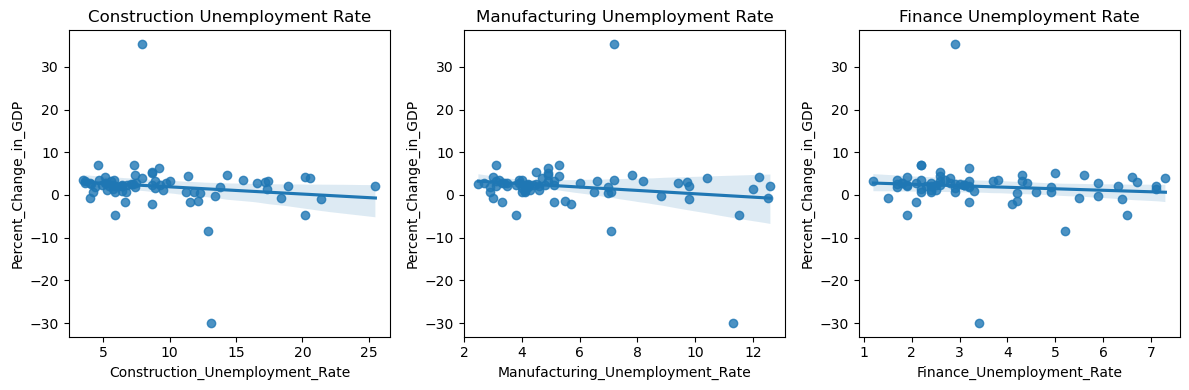

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.regplot(x='Construction_Unemployment_Rate', y='Percent_Change_in_GDP', data=merged, ax=axes[0])
axes[0].set_title('Construction Unemployment Rate')

sns.regplot(x='Manufacturing_Unemployment_Rate', y='Percent_Change_in_GDP', data=merged, ax=axes[1])
axes[1].set_title('Manufacturing Unemployment Rate')

sns.regplot(x='Finance_Unemployment_Rate', y='Percent_Change_in_GDP', data=merged, ax=axes[2])
axes[2].set_title('Finance Unemployment Rate')

plt.tight_layout()

plt.show()

In [11]:
GDP_CUR = sm_ols('Percent_Change_in_GDP ~ Construction_Unemployment_Rate', data = merged).fit()

In [12]:
GDP_MUR = sm_ols('Percent_Change_in_GDP ~ Manufacturing_Unemployment_Rate', data = merged).fit()

In [13]:
GDP_FUR =  sm_ols('Percent_Change_in_GDP ~ Finance_Unemployment_Rate', data = merged).fit()

In [14]:
GDP_UR =  sm_ols('Percent_Change_in_GDP ~ Construction_Unemployment_Rate + Manufacturing_Unemployment_Rate + Finance_Unemployment_Rate', data = merged).fit()

In [15]:
info_dict2={'No. observations' : lambda x: f"{int(x.nobs):d}"}
info_dict2={'No. observations' : lambda x: "{:,.0f}".format(x.nobs)}
table2 = summary_col(results=[GDP_CUR,GDP_MUR,GDP_FUR,GDP_UR],
                    float_format='%0.2f',
                    stars = True,
                    model_names=['GDP_CUR','GDP_MUR','GDP_FUR','GDP_UR'],
                    info_dict=info_dict,
                    regressor_order=['Intercept','Construction_Unemployment_Rate','Manufacturing_Unemployment_Rate','Finance_Unemployment_Rate'],
                   
                   )
table2.add_title('OLS Regressions of Percent Change in GDP')
print(table2)

           OLS Regressions of Percent Change in GDP
                                GDP_CUR GDP_MUR GDP_FUR GDP_UR
--------------------------------------------------------------
Intercept                       3.59**  4.22**  3.22*   3.62**
                                (1.49)  (1.64)  (1.71)  (1.78)
Construction_Unemployment_Rate  -0.17                   -0.03 
                                (0.14)                  (0.42)
Manufacturing_Unemployment_Rate         -0.39           -0.97 
                                        (0.26)          (0.76)
Finance_Unemployment_Rate                       -0.35   1.19  
                                                (0.45)  (1.08)
R-squared                       0.02    0.03    0.01    0.05  
R-squared Adj.                  0.01    0.02    -0.01   0.01  
No. observations                72      72      72      72    
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


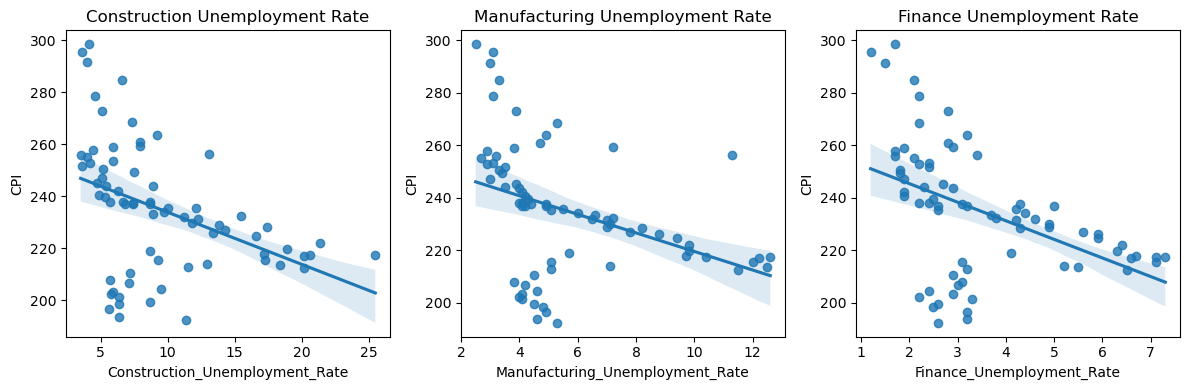

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.regplot(x='Construction_Unemployment_Rate', y='CPI', data=merged, ax=axes[0])
axes[0].set_title('Construction Unemployment Rate')

sns.regplot(x='Manufacturing_Unemployment_Rate', y='CPI', data=merged, ax=axes[1])
axes[1].set_title('Manufacturing Unemployment Rate')

sns.regplot(x='Finance_Unemployment_Rate', y='CPI', data=merged, ax=axes[2])
axes[2].set_title('Finance Unemployment Rate')

plt.tight_layout()

plt.show()

In [17]:
CPI_CUR = sm_ols('CPI ~ Construction_Unemployment_Rate', data = merged).fit()

In [18]:
CPI_MUR = sm_ols('CPI ~ Manufacturing_Unemployment_Rate', data = merged).fit()

In [19]:
CPI_FUR =  sm_ols('CPI ~ Finance_Unemployment_Rate', data = merged).fit()

In [20]:
CPI_UR =  sm_ols('CPI ~ Construction_Unemployment_Rate + Manufacturing_Unemployment_Rate + Finance_Unemployment_Rate', data = merged).fit()

In [21]:
info_dict3={'No. observations' : lambda x: f"{int(x.nobs):d}"}
info_dict3={'No. observations' : lambda x: "{:,.0f}".format(x.nobs)}
table3 = summary_col(results=[CPI_CUR,CPI_MUR,CPI_FUR,CPI_UR],
                    float_format='%0.2f',
                    stars = True,
                    model_names=['CPI_CUR','CPI_MUR','CPI_FUR','CPI_UR'],
                    info_dict=info_dict,
                    regressor_order=['Intercept','Construction_Unemployment_Rate','Manufacturing_Unemployment_Rate','Finance_Unemployment_Rate'],
                   
                   )
table3.add_title('OLS Regressions of CPI')
print(table3)

                        OLS Regressions of CPI
                                 CPI_CUR   CPI_MUR   CPI_FUR    CPI_UR 
-----------------------------------------------------------------------
Intercept                       253.92*** 254.93*** 259.57*** 258.18***
                                (5.58)    (6.30)    (6.25)    (6.63)   
Construction_Unemployment_Rate  -2.00***                      -0.84    
                                (0.52)                        (1.56)   
Manufacturing_Unemployment_Rate           -3.54***            1.98     
                                          (1.00)              (2.84)   
Finance_Unemployment_Rate                           -7.09***  -7.61*   
                                                    (1.63)    (4.03)   
R-squared                       0.18      0.15      0.21      0.22     
R-squared Adj.                  0.17      0.14      0.20      0.18     
No. observations                72        72        72        72       
Standard errors i